Logan Williamson
====
Homework 10
====
####CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.4 (3/26/2015)

----

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("talk")
#seaborn.set_style("white")
import scipy.stats
import scipy.optimize
import numpy.linalg as linalg

0. Warm-up (3 EC Points)
===

Correct three problems you've gotten wrong on the last two homeworks. State the problem, what your mistake was, and what lecture you could go to learn more about it.

####HW 7 #5

I messed up my function for T(x) causing my concentration of reactants to be incorrect. The correct function is shown below. This material was covered in Unit 7 Lecture 2.

In [2]:
def delta_T(x):
    cp = 17.89 #BTU / (lb-mol R)
    density = 8.345 #lb / gal
    MW = 18 #lb-mol / mol
    delta_Q = 863.9 * x
    delta_T = delta_Q / (cp * density * 25.0 / MW)
    return delta_T

####HW 7 #6

My constaint was invalid. The correct constaint is shown below. Constainted optimization was covered in Unit 7 Lecture 2.

In [3]:
def constraint(x):
    return -1 * x[0] * x[1]

#print constraint([1,-2])
#print constraint([1,2])
constraints = {'type':'ineq', 'fun':constraint}

####HW 7 #8

I failed to state what p(t) was. This is shown below. Working with functions of random variables was covered in Unit 8 Lecture 1.

$p(t) = \lambda e^{-\lambda t}$

***

1. Short Answer Questions (8 Points + 2 EC)
====
You may skip 2 for full credit, or answer them for EC.

1. An objective function is a function to be minimized. How many dimensions are the domain and range?
2. In Python, to use the `minimize` function, you must pass in an objective function. How many arguments should your objective function take?
3. Over the past few weeks, attendance in lecture for the 55 students has been about 90%. Today, I observe there are 40 students in lecture. Is this abnormal? Only answer what hypothesis test to use, do not do any calculations
4. The number text messages you get from your girlfriend is about 25 per day. You receive 20 today. Is this unusual? What hypothesis test could you use? Do not do any calculations.
5. You would like to use the $t$-test on some data, but you're not sure if the data is normally distributed. What could you do to check that?
6. What is the difference between $y$ and $\hat{y}$ in linear regression?
7. What is a residual? Use a complete sentence
8. What is the equation for SSE and SSR?
9. What is the equation for the goodness of fit?
10. We covered three types of least-squares regression. Name them

####1 Solutions

1. In an objective function, the domain is N dimensions and the range is 1 dimension.
2. An objective function takes 1 argument.
3. $zI$ test because the population is made up of two mutually exclusive classes, either present or absent, and the number of samples is greater than 4, meaning it is beyond the limits of the Binomial test.
4. Poisson's test is applicable because there are less than 40 samples.
5. Use the Shapiro-Wilk Test to check for normal distribution. 
6. $y$ is the actual range of the data, while $\hat{y}$ is the best guess for the y values in our model.
7.  Residual - the difference between $\hat{y}$ and $y$ at a particular point ($\hat{y}_i - y_i$).
8. $$SSE = SSR = \sum_i (\hat{y}_i - y_i)^2$$
9. $$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(\hat{y}_i - y\right)^2}{\sum_i \left(\bar{y} - y\right)^2}$$
10. Ordinary Linear least-squares, Mutidimensinal least-squares, Nonlinear least-squares.
***

2. Exercises (14 Points)
====

1. After three experiments and hypothesis tests, I've found $p$-values of 0.1, 0.2, and 0.16. Should I accept or reject the null hypothesis?

2. Are these numbers normally distributed: $[1.1,2.2,5.4,5.5,3.2,2.6,1.5]$?

4. I compute an intercept of 0.2 with a standard error of 0.05 and 50 samples. Should we reject the null hypothesis that there should be no intercept?

5. If my goodness of fit, $R^2$, is 0.95 what would my correlation coefficient be?

6. If my model equation is $y = \beta_0 x^3 + \beta_1 \ln x - \beta_2 + \epsilon$ and $x_4 = 2$, what would the 4th row be in my $\mathbf{X}$ matrix?

7. If my $\mathbf{X}$ matrix has dimension $100 \times 4$, how many observations do I have, how many dimensions is my model domain, my model range and how many degrees of freedom are there?

9. If my model equation is $y = \beta_0 x^2 + \beta_1 \ln x + \epsilon$, what would $\mathbf{F}_{11}$ be if $\hat{\beta_0} = 2.5$, $\hat{\beta_1} = -1$ and $x_1 = 2.2$?


####2.1 Solution

In [4]:
p = [0.1, 0.2, 0.16]
statistic = -2 * np.sum(np.log(p)) 
interval_area = (1 - scipy.stats.chi2.cdf(statistic, 2 * len(p)))
print 'Overall p =', interval_area, 'therefore ACCEPT the null hypothesis.'

Overall p = 0.074383503113 therefore ACCEPT the null hypothesis.


####2.2 Solution

**Null Hypothesis**: Numbers are normally distributed.

In [5]:
numbers = [1.1, 2.2, 5.4, 5.5, 3.2, 2.6, 1.5]
x = scipy.stats.shapiro(numbers)
print 'p = ', x[1], 'therefore the numbers are normally distributed.'

p =  0.248052805662 therefore the numbers are normally distributed.


####2.3 Solution

**Null Hypothesis**: There is no intercept.

In [6]:
alpha_hat = 0.2
s2_alpha =  0.05
N = 50
T = alpha_hat / sqrt(s2_alpha)
interval_area = scipy.stats.t.cdf(T,N) - scipy.stats.t.cdf(-T, N)
print 'p =', 1 - interval_area,'therefore we accept the null hypothesis that there is no intercept.'

p = 0.375378807319 therefore we accept the null hypothesis that there is no intercept.


####2.4 Solution

In [7]:
R_squared=0.95
print 'The correlaton coefficient (R) =', sqrt(R_squared)

The correlaton coefficient (R) = 0.974679434481


####2.5 Solution

4th Row = $2^{3}$, $ln(2)$, $-1$

####2.6 Solution

Observations = 100

Domain = 4 Dimensions

Range = 1 Dimension

DOF = 96

####2.7 Solution

$$y = \beta_0{x^{2}} + \beta_1{ln{x}} + \epsilon $$

$$f(\beta, x) = \beta_0{x^{2}} + \beta_1{ln{x}}$$

$$\frac{\partial f}{\partial \beta_0} = x^2$$

$$\frac{\partial f}{\partial \beta_1} = ln(x)$$

$$ F_{11} = \frac{\partial f(\hat{\beta}, x_1)}{\partial \hat{\beta_1}}$$
$$F_{11} = ln(2.2)$$

***

3. Linear Least Squares (10 Points)
====

There is data for inlet temperature and outlet pressure in the next cell. Answer the following questions:

1. [2 points] Construct a hypothesis test to show if there is a correlation.
2. [6 points] Construct a linear model and justify/omit the use of an intercept with a hypothesis test. Plot your model and data
3. [2 points] Validate the assumption of normally distributed noise

*Hint: The answer is slope of 0.2, there is correlation, no intercept, and the noise is normal*

In [8]:
import numpy as np
temperature = np.array([297.70, 309.02,  327.41,  352.27,  370.60,  376.25,  406.70,  420.97,  433.88,  448.29])
pressure = np.array([57.07, 64.87,  68.93,  74.13,  77.40,  74.83,  81.22,  85.72,  90.35,  89.99])

####3.1 Solution

**Null Hypothesis**: Temperature and Pressure are not correlated

In [9]:
x = scipy.stats.spearmanr(temperature,pressure)
print x
print 'p-value = ',x[1], 'REJECT the null hypothesis... temperature and pressure are correlated.'

(0.97575757575757582, 1.4675461874041932e-06)
p-value =  1.4675461874e-06 REJECT the null hypothesis... temperature and pressure are correlated.


####3.2 Solution

In [10]:
def obj(arg): #Objective functions take 1 argument but that argument can have N-dimensions
    alpha = arg[0]
    beta = arg[1]
    yhat = alpha + beta * temperature
    sse = np.sum((yhat - pressure)**2)
    return sse

result = scipy.optimize.minimize(obj, x0=[300,70])
print result

   status: 0
  success: True
     njev: 7
     nfev: 28
 hess_inv: array([[  2.84290852e+00,  -7.46150514e-03],
       [ -7.46150514e-03,   1.99340780e-05]])
      fun: 41.75097984438236
        x: array([ 1.02033681,  0.20151977])
  message: 'Optimization terminated successfully.'
      jac: array([  0.00000000e+00,   5.24520874e-06])


1.02033681319 0.201519768944


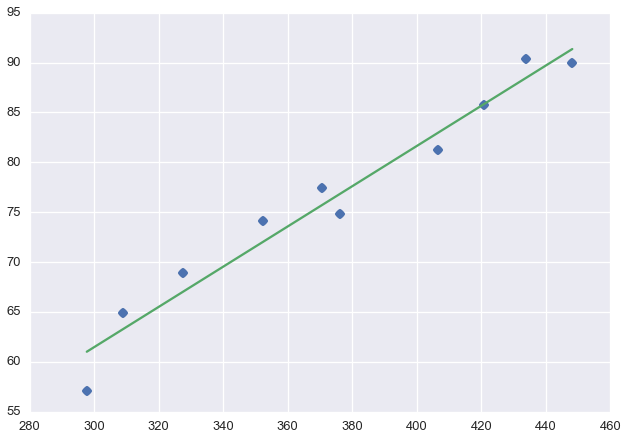

In [11]:
alpha_hat = result.x[0]
beta_hat = result.x[1]

print alpha_hat, beta_hat

plt.plot(temperature,pressure, 'o')
plt.plot(temperature, alpha_hat + beta_hat * temperature)
plt.show()

**Null Hypothesis**: There is no intercept.

In [12]:
s2_epsilon = np.sum((pressure - alpha_hat - beta_hat * temperature) ** 2) / len(temperature)
s2_alpha =  s2_epsilon * (1. / len(temperature) + np.mean(temperature) ** 2 / (np.sum((np.mean(temperature) - temperature) ** 2)))

print 'The standard error for the intercept is', np.sqrt(s2_alpha)

The standard error for the intercept is 4.87225290058


In [13]:
T = alpha_hat / sqrt(s2_alpha)
interval_area = scipy.stats.t.cdf(T, len(temperature)) - scipy.stats.t.cdf(-T, len(temperature))
print 'p = ',1 - p 
print 'Accept the Null Hypothesis that there is no intercept.'

p = 

TypeError: unsupported operand type(s) for -: 'int' and 'list'

####3.3 Solution

**Null Hypothesis**: The noise is normally distributed.

In [14]:
resids = pressure - beta_hat * temperature
x = scipy.stats.shapiro(resids)
print x
print 'p = ',x[1],'ACCEPT the null hypothesis therefore the noise is normally distributed.'

 (0.8632148504257202, 0.08325748890638351)
p =  0.0832574889064 ACCEPT the null hypothesis therefore the noise is normally distributed.


***

4. Multidimensional Least Squares (10 Points)
====

We have reason to believe the relationship for the reaction equilbrium constant and temperature follows a polynomial relationship of:

$$k = \beta_0 + \beta_1 T + \beta_2 T^2 + \epsilon$$

However, we aren't sure if the square term is necessary. Construct a model and create a hypothesis test to validate the existence of $\beta_2$. Plot your data and model with and without the $\beta_2$ term. *Hint:  To make the plot, you'll need to repeat the regression with a $k = \beta_0 + \beta_1 T +\epsilon$ equation. You can't just use the same $\beta$ vector with a $\beta_2 = 0$ term.*

In [15]:
temperature = np.array([296.94, 307.80,  311.87,  330.55,  336.64,  342.08,  349.70,  358.00,  379.44,  372.26,  379.35,  390.55,  390.10,  406.08,  420.42,  423.35,  441.47,  446.69,  448.03,  448.54,  467.98,  476.03,  487.94,  494.36,  501.42])
k = np.array([37.07, 29.74,  25.01,  30.12,  29.28,  24.78,  24.81,  32.42,  27.31,  35.23,  28.99,  23.54,  38.43,  26.44,  28.09,  25.98,  32.82,  28.99,  27.24,  33.48,  38.21,  30.82,  31.05,  35.38,  23.31])

####4 Solution

In [16]:
#Creating a model with the T squared term
x_mat = np.column_stack( (np.ones(len(temperature)), temperature, temperature**2) )
print x_mat

[[  1.00000000e+00   2.96940000e+02   8.81733636e+04]
 [  1.00000000e+00   3.07800000e+02   9.47408400e+04]
 [  1.00000000e+00   3.11870000e+02   9.72628969e+04]
 [  1.00000000e+00   3.30550000e+02   1.09263303e+05]
 [  1.00000000e+00   3.36640000e+02   1.13326490e+05]
 [  1.00000000e+00   3.42080000e+02   1.17018726e+05]
 [  1.00000000e+00   3.49700000e+02   1.22290090e+05]
 [  1.00000000e+00   3.58000000e+02   1.28164000e+05]
 [  1.00000000e+00   3.79440000e+02   1.43974714e+05]
 [  1.00000000e+00   3.72260000e+02   1.38577508e+05]
 [  1.00000000e+00   3.79350000e+02   1.43906423e+05]
 [  1.00000000e+00   3.90550000e+02   1.52529303e+05]
 [  1.00000000e+00   3.90100000e+02   1.52178010e+05]
 [  1.00000000e+00   4.06080000e+02   1.64900966e+05]
 [  1.00000000e+00   4.20420000e+02   1.76752976e+05]
 [  1.00000000e+00   4.23350000e+02   1.79225223e+05]
 [  1.00000000e+00   4.41470000e+02   1.94895761e+05]
 [  1.00000000e+00   4.46690000e+02   1.99531956e+05]
 [  1.00000000e+00   4.48030

In [17]:
beta_hat = linalg.inv(x_mat.transpose().dot(x_mat)).dot(x_mat.transpose()).dot(k)
print beta_hat
beta_opt = beta_hat[2]

[  5.12689002e+01  -1.16192237e-01   1.53635956e-04]


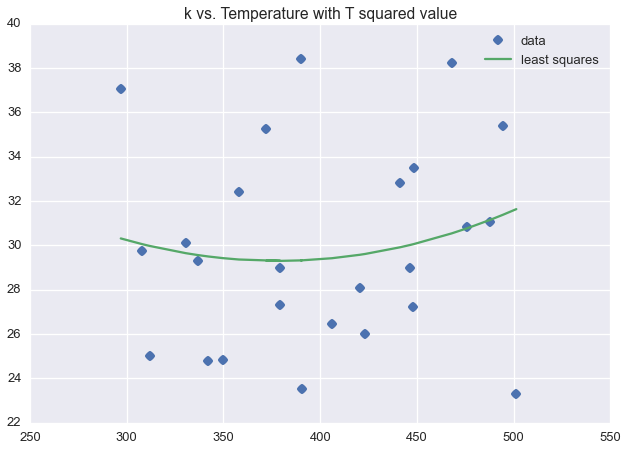

In [18]:
plt.plot(temperature,k, 'o', label='data')
plt.plot(temperature,x_mat.dot(beta_hat), label='least squares')
plt.legend(loc='upper right')
plt.title('k vs. Temperature with T squared value')
plt.show()

In [19]:
#Now to create a model without the T squared term
X_mat = np.column_stack( (np.ones(len(temperature)), temperature) )
print X_mat

[[   1.    296.94]
 [   1.    307.8 ]
 [   1.    311.87]
 [   1.    330.55]
 [   1.    336.64]
 [   1.    342.08]
 [   1.    349.7 ]
 [   1.    358.  ]
 [   1.    379.44]
 [   1.    372.26]
 [   1.    379.35]
 [   1.    390.55]
 [   1.    390.1 ]
 [   1.    406.08]
 [   1.    420.42]
 [   1.    423.35]
 [   1.    441.47]
 [   1.    446.69]
 [   1.    448.03]
 [   1.    448.54]
 [   1.    467.98]
 [   1.    476.03]
 [   1.    487.94]
 [   1.    494.36]
 [   1.    501.42]]


In [20]:
Beta_hat = linalg.inv(X_mat.transpose().dot(X_mat)).dot(X_mat.transpose()).dot(k)
print Beta_hat

[  2.71725726e+01   6.91731823e-03]


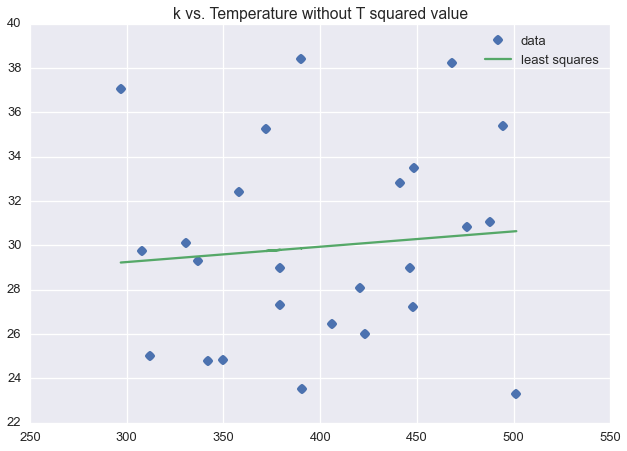

In [21]:
plt.plot(temperature,k, 'o', label='data')
plt.plot(temperature,X_mat.dot(Beta_hat), label='least squares')
plt.legend(loc='upper right')
plt.title('k vs. Temperature without T squared value')
plt.show()

**Null Hypothesis**: $\beta_{2}$ = 0

In [22]:
yhat = x_mat.dot(beta_hat)
resids = yhat - k
SSR = np.sum(resids**2)
se2_epsilon = SSR / (len(temperature) - len(beta_hat)) #This denominator is code for N - D degrees of freedom
print se2_epsilon

21.6705657206


In [23]:
se2_beta = se2_epsilon * linalg.inv(x_mat.transpose().dot(x_mat))

T = beta_opt / sqrt(se2_beta[2,2])
interval_area = scipy.stats.t.cdf(T, len(temperature) - 3) - scipy.stats.t.cdf(-T, len(temperature) - 3)
print 'p = ', 1 - interval_area, 'therefore we ACCEPT the null hypotheis that the T squared term is negligible.'



p =  0.582380535616 therefore we ACCEPT the null hypotheis that the T squared term is negligible.


***

5. Nonlinear Least-Squares (10 Points)
===

I believe my model equation is:

$$z = \beta_0 e^{-(x - y)^2 / \beta_1} + \epsilon$$ 

for a process. Fit the data in the next cell and provide confidence inervals for the fit parameters. Provide justification for the model equation with goodness of fit and analyzing the residuals. *Hint: the beta_0 is 0.2, beta_1 is 3 and the fit should be very good*

In [24]:
x = [-5.0210, -4.5076,  -4.2580,  -3.6400,  -3.3103,  -3.0171,  -2.7301,  -1.9661,  -1.5375,  -1.4176,  -0.8102,  -0.5459,  -0.0232,  0.4361,  0.8681,  1.4101,  1.7128,  2.0384,  2.4618,  2.7842,  3.3076,  3.9118,  4.1108,  4.7495,  5.0657]
y = [3.1361, 2.7857,  2.6115,  3.3616,  1.3278,  2.5540,  1.1674,  -0.0582,  0.4251,  0.4854,  0.1072,  0.3087,  0.7683,  0.6546,  0.2578,  -0.0138,  -0.6708,  -1.6326,  -1.5211,  -2.0489,  -1.6844,  -1.8580,  -2.8420,  -1.6421,  -2.0377]
z = [0.0035, 0.0011,  -0.0109,  -0.0028,  -0.0062,  -0.0002,  -0.0147,  0.0745,  0.0657,  0.0433,  0.1344,  0.1534,  0.1516,  0.1934,  0.1818,  0.0918,  0.0318,  -0.0040,  0.0183,  0.0083,  0.0046,  0.0057,  0.0036,  0.0123,  -0.0077]
x = np.array(x)
y = np.array(y)
z = np.array(z)

####5 Solution

In [25]:
def obj(arg):
    beta_0 = arg[0]
    beta_1 = arg[1]
    zhat = beta_0 * np.exp(-(x-y)**2 / beta_1) 
    SSR = np.sum( (zhat - z)**2 )
    return SSR


result = scipy.optimize.minimize(obj, x0=[1,1])
print result

beta_opt = result.x
beta_0=result.x[0]
beta_1=result.x[1]

   status: 0
  success: True
     njev: 17
     nfev: 68
 hess_inv: array([[  2.05047754e-01,  -4.95639599e+00],
       [ -4.95639599e+00,   3.21033459e+02]])
      fun: 0.002110268517346442
        x: array([ 0.19321194,  3.03957183])
  message: 'Optimization terminated successfully.'
      jac: array([  6.68267603e-06,   2.40484951e-07])


In [26]:
def build_F(beta, x, y):
    beta_0_vec = np.exp(-(x-y)**2 /beta_1) 
    beta_1_vec = -beta_0 * (x-y)**2 * np.exp(-(x-y)**2 / beta_1) 
    return np.column_stack( (beta_0_vec, beta_1_vec) )

print build_F(beta_opt, x, y)

[[  3.11171956e-10  -4.00042354e-09]
 [  2.51123224e-08  -2.58088697e-07]
 [  1.80917823e-07  -1.64955029e-06]
 [  9.90083269e-08  -9.37778485e-07]
 [  8.44046258e-04  -3.50816827e-03]
 [  3.67626304e-05  -2.20456261e-04]
 [  6.75426621e-03  -1.98236843e-02]
 [  3.01928755e-01  -2.12348718e-01]
 [  2.81614111e-01  -2.09581021e-01]
 [  3.03789344e-01  -2.12561234e-01]
 [  7.58138956e-01  -1.23282160e-01]
 [  7.86409488e-01  -1.10970738e-01]
 [  8.13747281e-01  -9.84975299e-02]
 [  9.84415810e-01  -9.08061815e-03]
 [  8.84671403e-01  -6.36652838e-02]
 [  5.13229664e-01  -2.01050279e-01]
 [  1.54247959e-01  -1.69324628e-01]
 [  1.18716928e-02  -3.09111649e-02]
 [  5.41279787e-03  -1.65903125e-02]
 [  4.59709188e-04  -2.07476397e-03]
 [  2.75053701e-04  -1.32434336e-03]
 [  1.75160100e-05  -1.12665423e-04]
 [  1.23870957e-07  -1.15697218e-06]
 [  1.45539678e-06  -1.14877384e-05]
 [  6.17321901e-08  -6.01836021e-07]]


In [27]:
resids = z - beta_0 * np.exp(-(x-y)**2 / beta_1)
SSR = np.sum(resids**2)
s2_epsilon = SSR / (len(x) - len(beta_opt))
print s2_epsilon 

9.1750805102e-05


In [28]:
F = build_F(beta_opt, x, y)

s2_beta = s2_epsilon * linalg.inv(F.transpose().dot(F))
print s2_beta

[[  3.70771703e-05   9.69152497e-05]
 [  9.69152497e-05   6.25866744e-04]]


In [29]:
T = scipy.stats.t.ppf(0.975, len(x) - len(beta_opt))
c0_width = T * np.sqrt(s2_beta[0,0])
print '95% confidence interval for beta_0 is {} +/ {}'.format(beta_0, c0_width)

c1_width = T * np.sqrt(s2_beta[1,1])
print '95% confidence interval for beta_1 is {} +/ {}'.format(beta_1, c1_width)

95% confidence interval for beta_0 is 0.193211935431 +/ 0.0125962684104
95% confidence interval for beta_1 is 3.03957182983 +/ 0.0517522877582


In [30]:
TSS = np.sum( (np.mean(y) - y)**2)
R2 = 1 - SSR / TSS
print R2
print 'the goodness of fit = ',R2, 'which is very good.'

0.999972663836
the goodness of fit =  0.999972663836 which is very good.
